# Regression - DecisionTreeRegressor – RandomForestRegressor -- Python

## Importations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

## 1 Préparation des données

### 1.2 Information sur les données


#### 1.

In [2]:
data = pd.read_csv('data/housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### 2.

In [4]:
print(data.shape)
data.info()

(20640, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### 3.

In [5]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### 4.

In [6]:
info = data.describe()
info.loc['median'] = data.median()
info

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000
median,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000


#### 5.

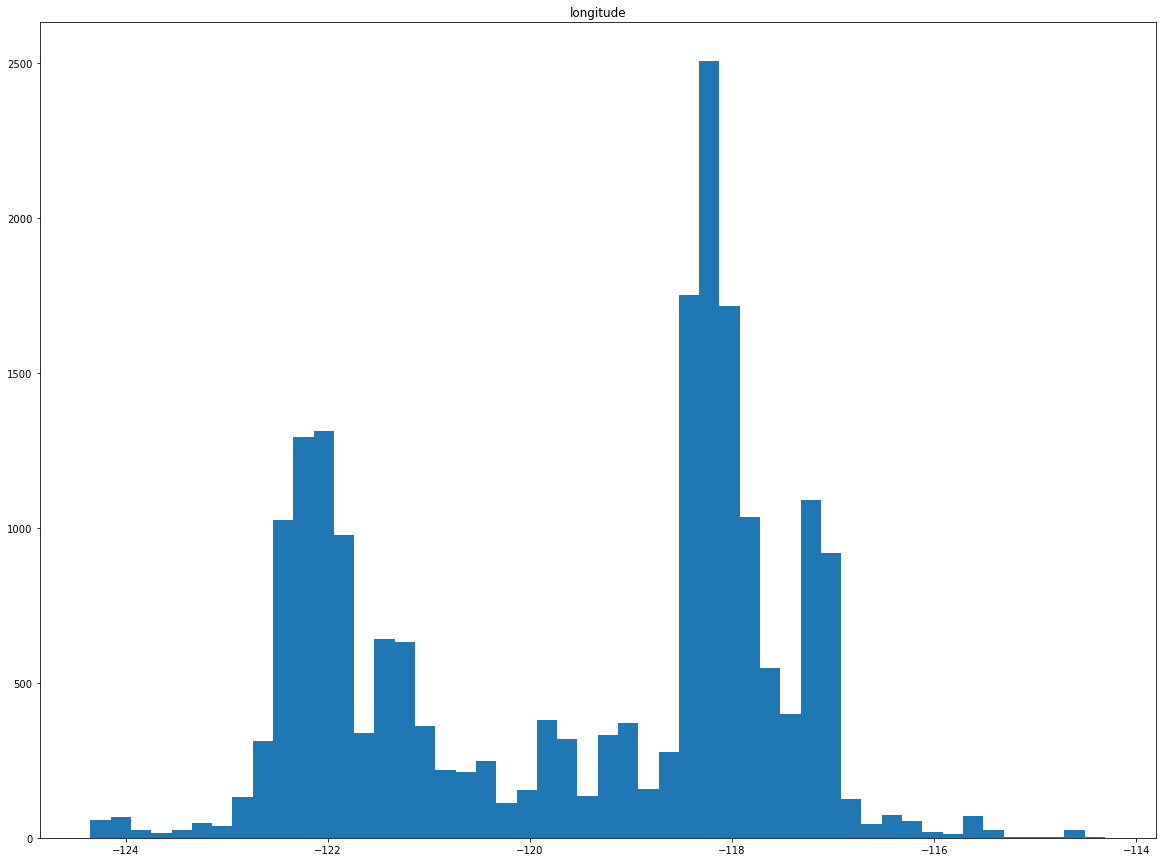

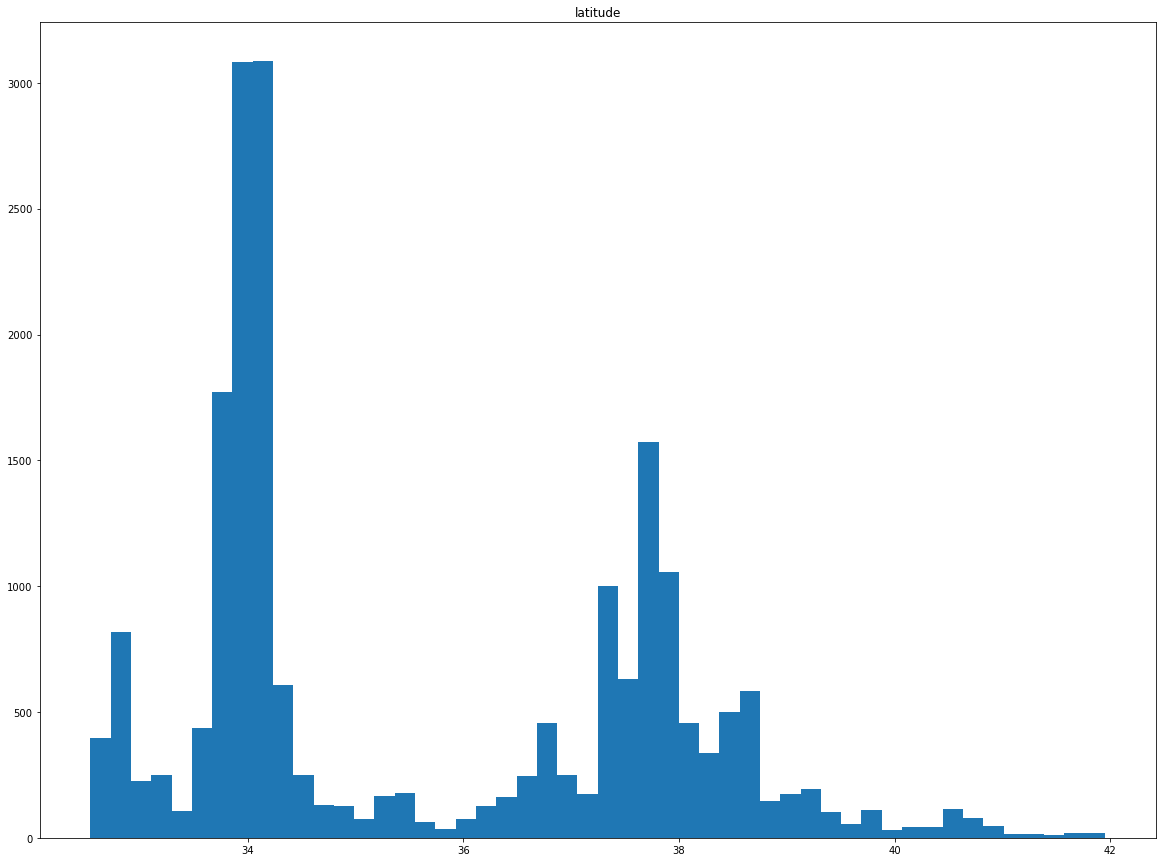

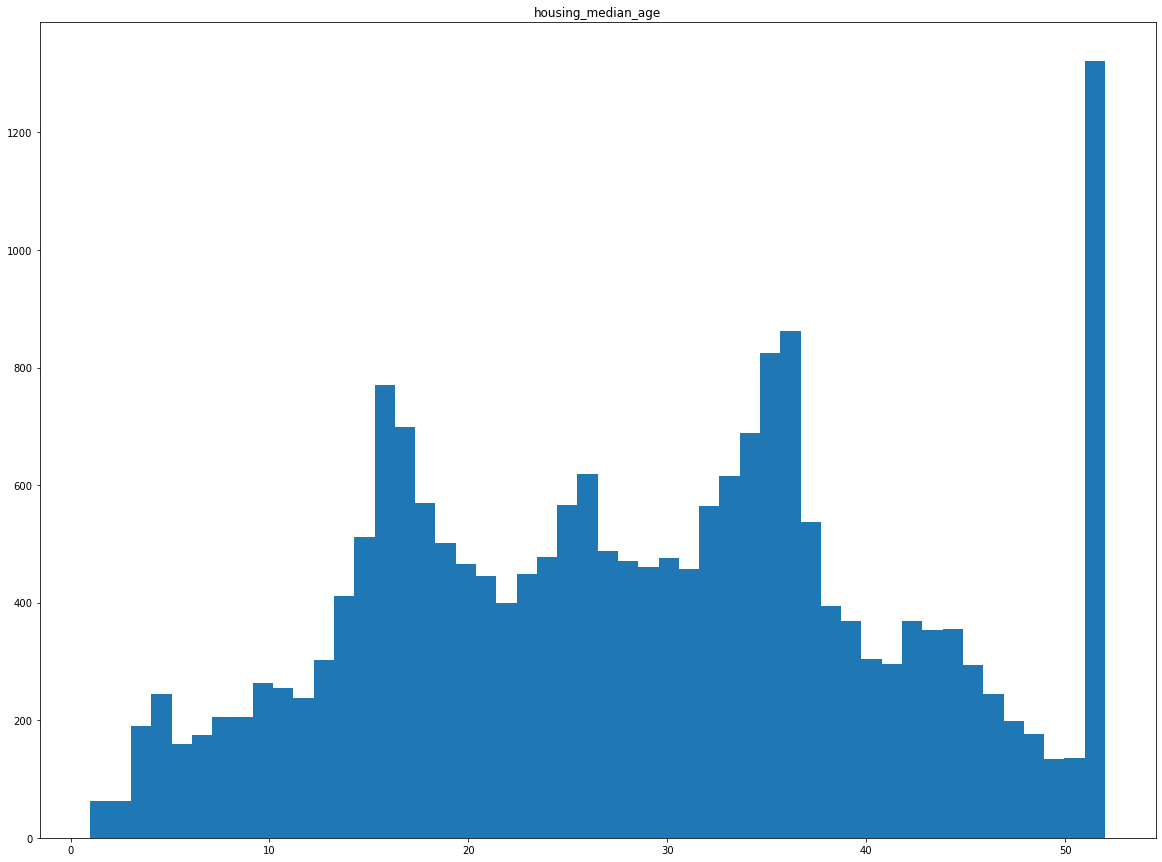

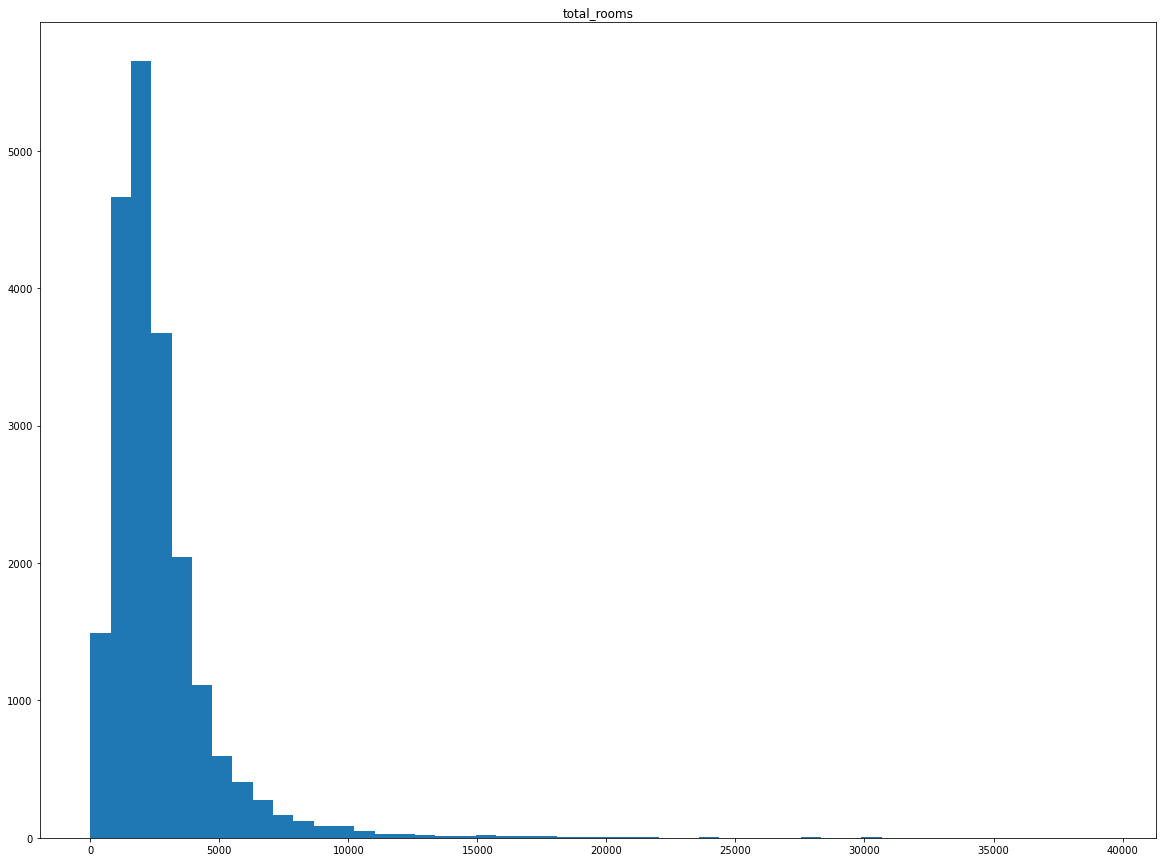

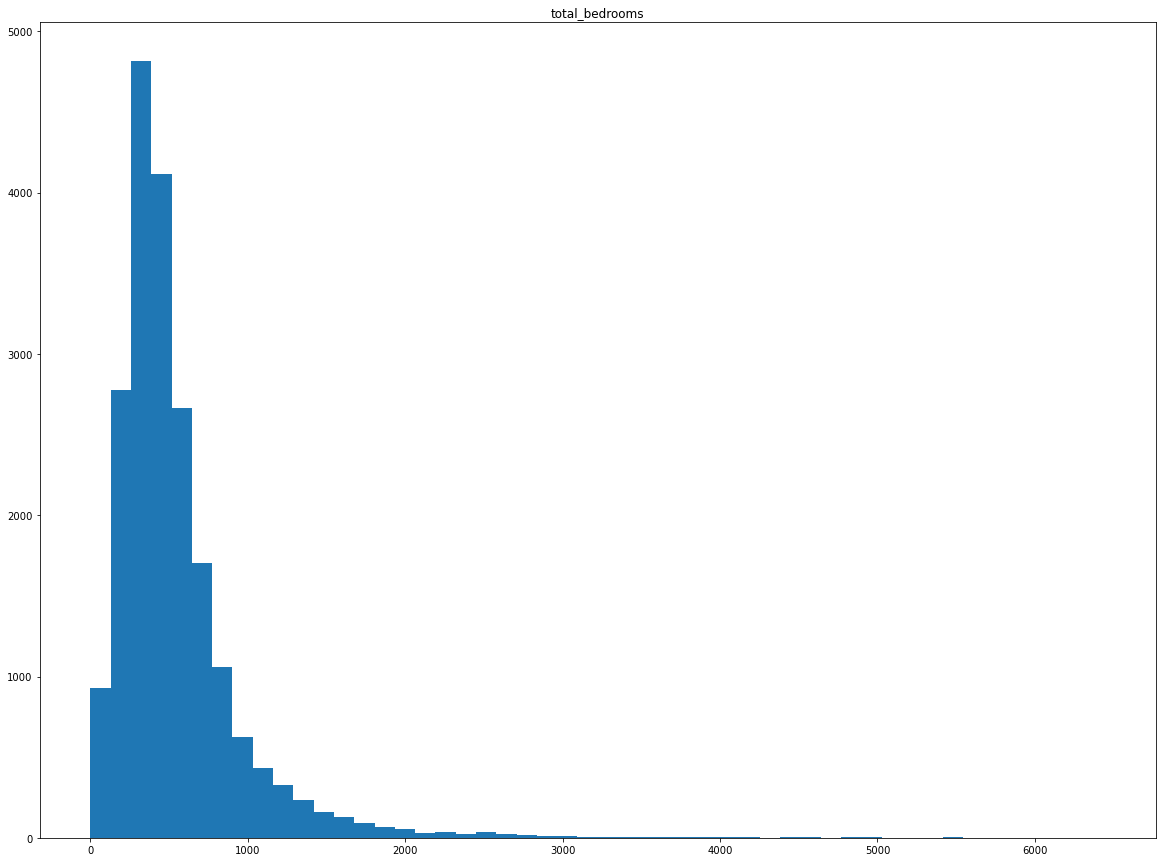

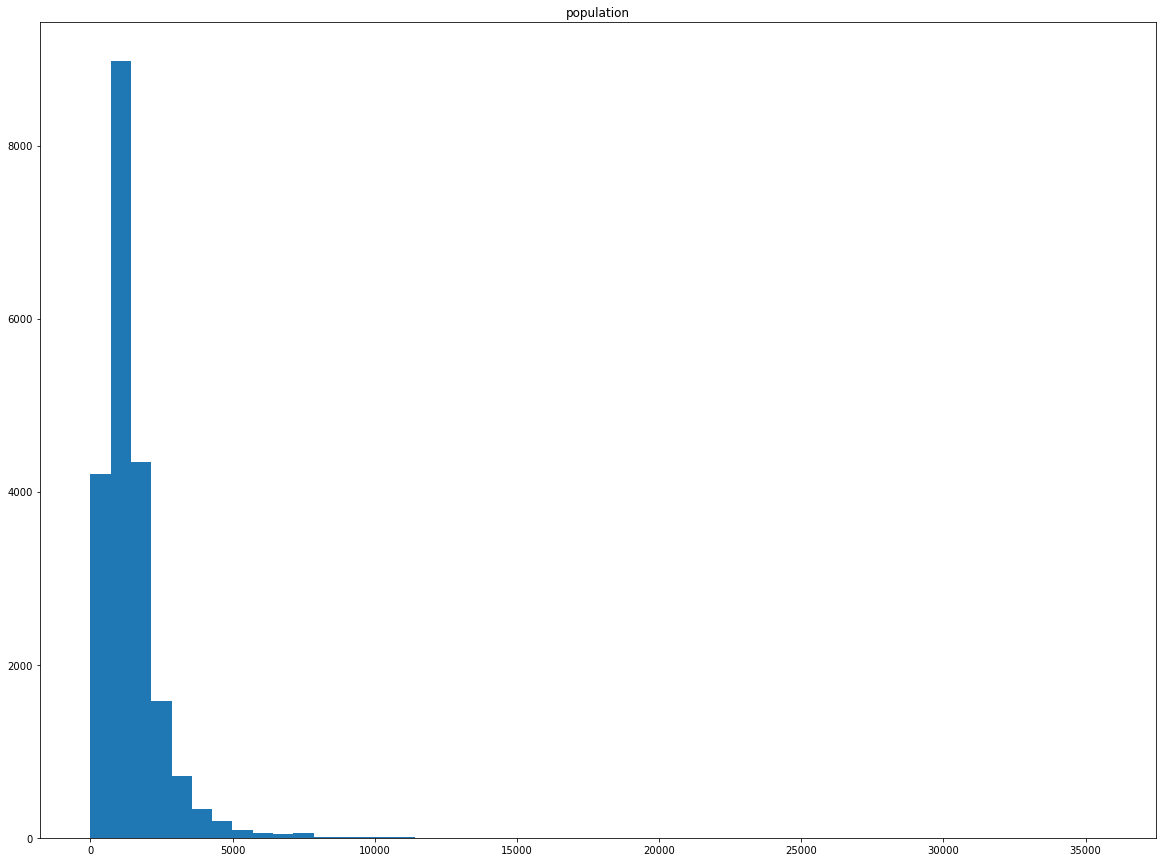

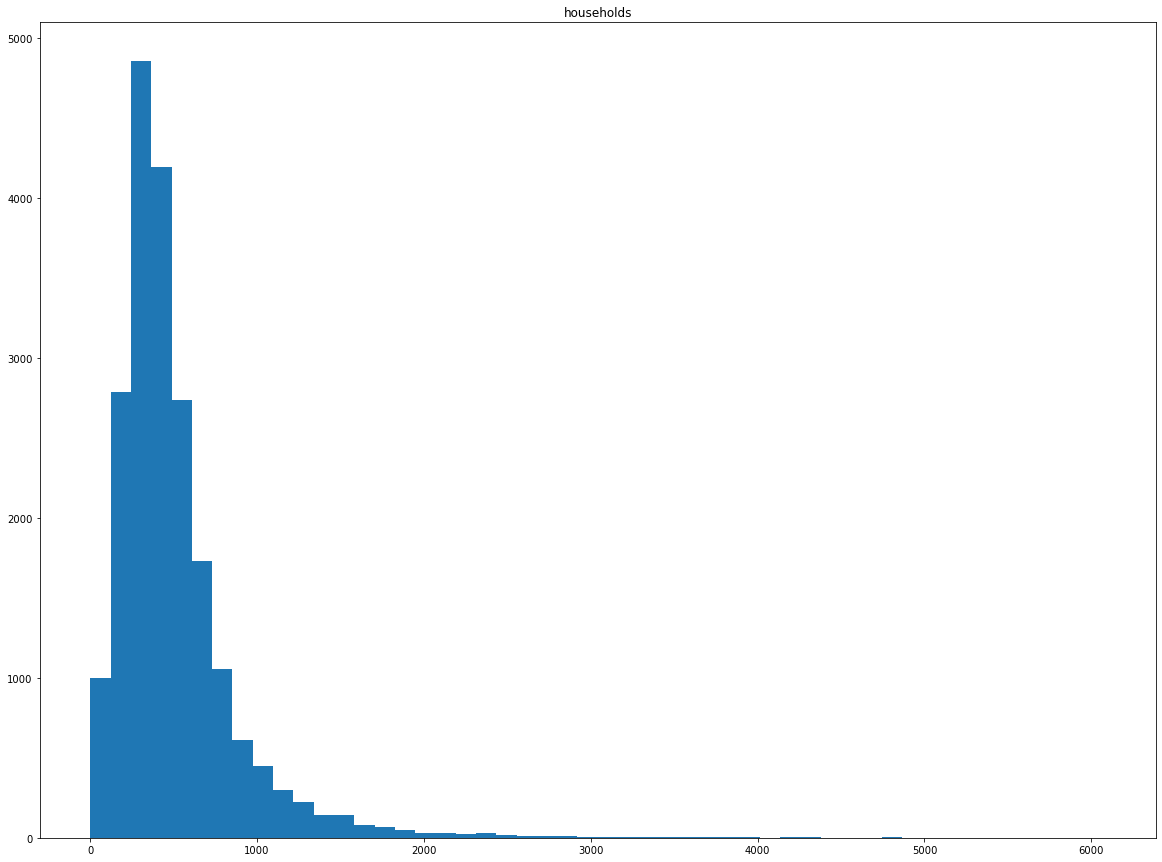

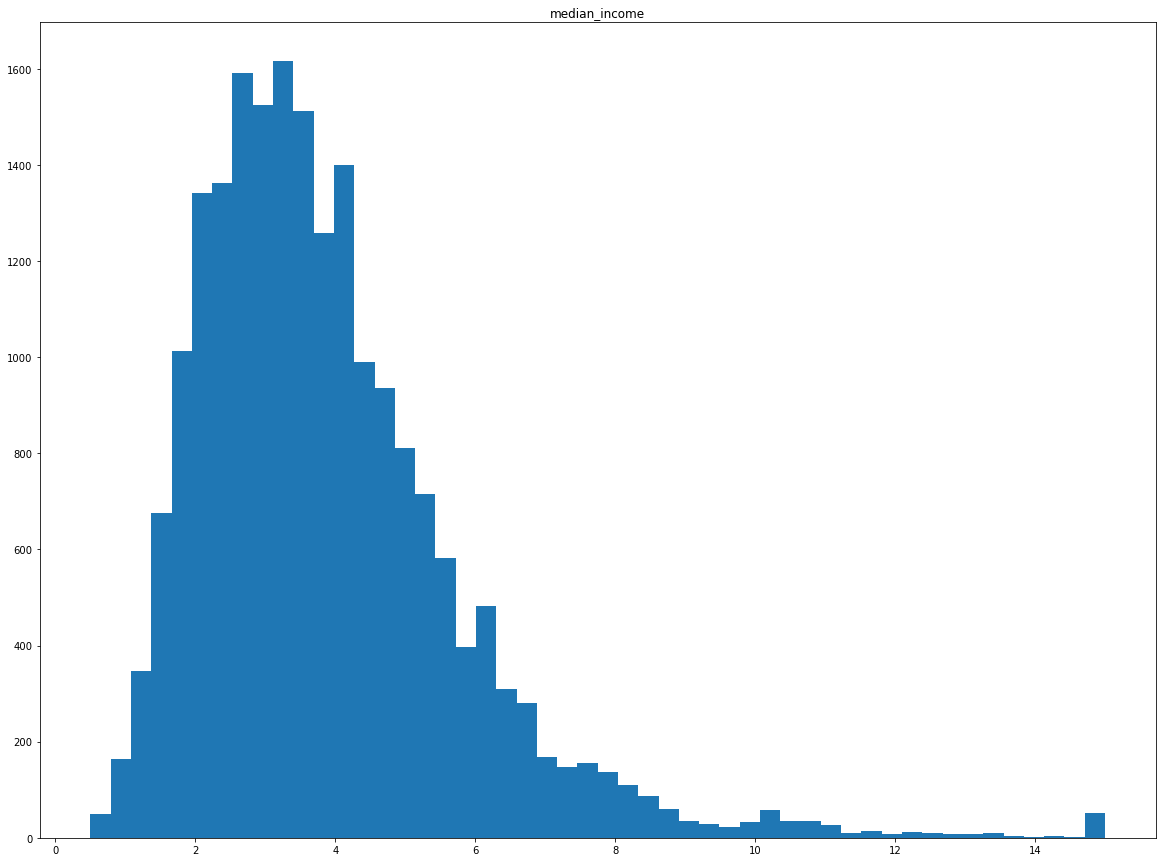

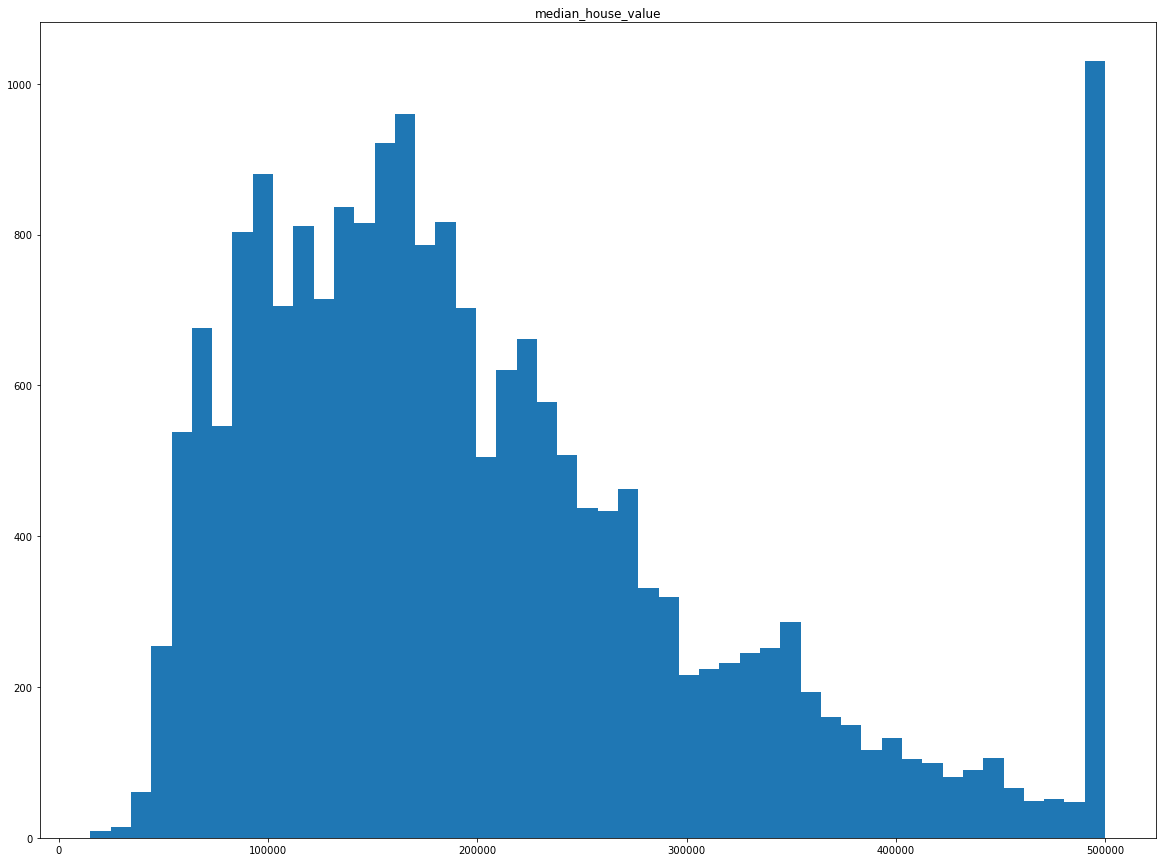

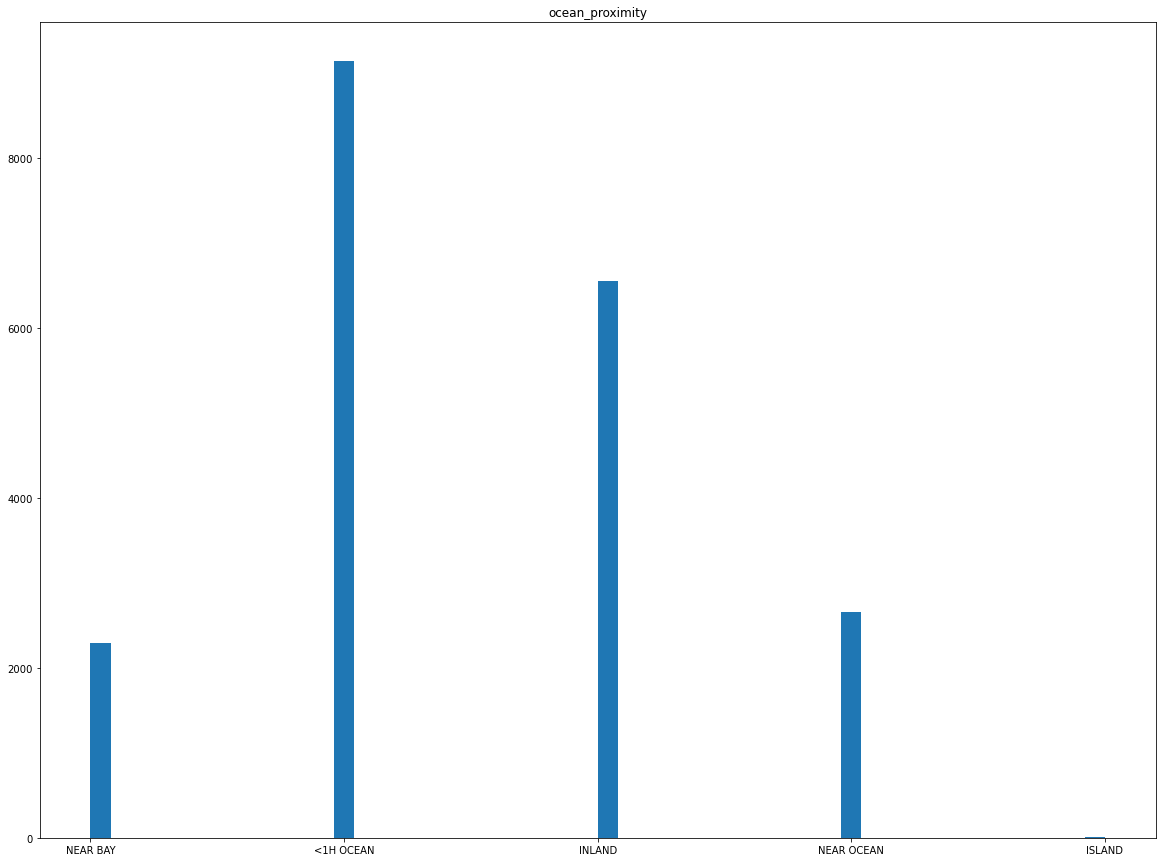

In [7]:
for var in data.columns:
    plt.figure(figsize=(20,15))
    plt.hist(data[var], bins=50)
    plt.title(var)
    plt.show()

### 1.3 Répartition des données

#### 1

In [8]:
data_train, data_test = train_test_split(data, test_size = 0.2, random_state = 0)
print(data_train.shape, data_test.shape)

(16512, 10) (4128, 10)


#### 2

In [9]:
data_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14740,-117.05,32.58,22.0,2101.0,399.0,1551.0,371.0,4.1518,136900.0,NEAR OCEAN
10101,-117.97,33.92,32.0,2620.0,398.0,1296.0,429.0,5.7796,241300.0,<1H OCEAN
20566,-121.84,38.65,29.0,3167.0,548.0,1554.0,534.0,4.3487,200700.0,INLAND
2670,-115.60,33.20,37.0,709.0,187.0,390.0,142.0,2.4511,72500.0,INLAND
15709,-122.43,37.79,25.0,1637.0,394.0,649.0,379.0,5.0049,460000.0,NEAR BAY


### 1.4 Découverte et visualisation des données

#### 1

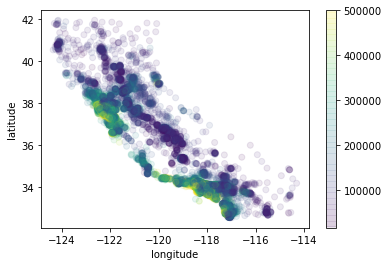

In [10]:
plt.scatter(data_train['longitude'],data_train['latitude'], c=data_train['median_house_value'], alpha=0.1)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar()
plt.show()

#### 3

In [11]:
img = mpimg.imread('images/california.png')

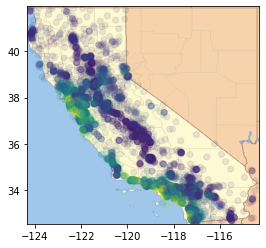

In [12]:
fig, ax = plt.subplots()
ax.imshow(img, extent=[-124.35, -114.31, 32.54, 41.95])
ax.scatter(data_train['longitude'],data_train['latitude'], c=data_train['median_house_value'], alpha=0.1)
plt.savefig("images/california_house.png")

#### 4

In [13]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


### 1.5 Nettoyage des données

#### 1

In [14]:
X = data_train.drop('median_house_value', axis=1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12069,-117.55,33.83,6.0,502.0,76.0,228.0,65.0,4.2386,INLAND
15925,-122.44,37.73,52.0,2381.0,492.0,1485.0,447.0,4.3898,NEAR BAY
11162,-118.00,33.83,26.0,1718.0,385.0,1022.0,368.0,3.9333,<1H OCEAN
4904,-118.26,34.01,38.0,697.0,208.0,749.0,206.0,1.4653,<1H OCEAN
4683,-118.36,34.08,52.0,2373.0,601.0,1135.0,576.0,3.1765,<1H OCEAN


In [15]:
y = data_train['median_house_value'].copy()
y.head()

12069    500001.0
15925    270000.0
11162    196100.0
4904     118800.0
4683     225000.0
Name: median_house_value, dtype: float64

#### 2

In [16]:
X['total_bedrooms'].fillna(X['total_bedrooms'].mean(), inplace=True)

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12069 to 2732
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


#### 3

In [18]:
LabEnc_X = LabelEncoder()
print(X['ocean_proximity'])
X['ocean_proximity']=LabEnc_X.fit_transform(X['ocean_proximity'])
print("***************")
print(X['ocean_proximity'])

12069        INLAND
15925      NEAR BAY
11162     <1H OCEAN
4904      <1H OCEAN
4683      <1H OCEAN
            ...    
13123        INLAND
19648        INLAND
9845     NEAR OCEAN
10799     <1H OCEAN
2732         INLAND
Name: ocean_proximity, Length: 16512, dtype: object
***************
12069    1
15925    3
11162    0
4904     0
4683     0
        ..
13123    1
19648    1
9845     4
10799    0
2732     1
Name: ocean_proximity, Length: 16512, dtype: int32


#### 4

In [19]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12069,-117.55,33.83,6.0,502.0,76.0,228.0,65.0,4.2386,1
15925,-122.44,37.73,52.0,2381.0,492.0,1485.0,447.0,4.3898,3
11162,-118.00,33.83,26.0,1718.0,385.0,1022.0,368.0,3.9333,0
4904,-118.26,34.01,38.0,697.0,208.0,749.0,206.0,1.4653,0
4683,-118.36,34.08,52.0,2373.0,601.0,1135.0,576.0,3.1765,0


## 2 Sélection, apprentissage et évaluation du modèle

#### 1

In [20]:
modele = LinearRegression()
modele.fit(X,y)
print('train score: ' , modele.score(X,y))

train score:  0.6378966747548479


#### 2

In [21]:
pred = modele.predict(X)

In [22]:
print(y)

12069    500001.0
15925    270000.0
11162    196100.0
4904     118800.0
4683     225000.0
           ...   
13123    144600.0
19648    159400.0
9845     289300.0
10799    484600.0
2732      69400.0
Name: median_house_value, Length: 16512, dtype: float64


In [23]:
print(pred)

[176068.14471547 279731.83770175 215080.26873766 ... 269773.6367019
 310713.67776769  34706.95938866]


#### 3

In [24]:
RMSE = mean_squared_error(y,pred,squared=False)
RMSE

69615.28357396205

In [25]:
scores_lin = cross_val_score(modele, X, y, scoring="neg_mean_squared_error", cv=10)
scores_lin

array([-5.21981001e+09, -4.50638366e+09, -5.02604646e+09, -4.63339179e+09,
       -5.45448299e+09, -4.82722624e+09, -4.61509664e+09, -4.64535140e+09,
       -5.40060071e+09, -4.42677134e+09])

In [43]:
rmse_scores = np.sqrt(-scores_lin)
print(rmse_scores)
print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", rmse_scores.std())

[72248.25261646 67129.60343077 70894.6151658  68069.02222191
 73854.47172552 69478.2429524  67934.50254152 68156.81476575
 73488.77948854 66533.986375  ]
Mean:		  69778.82912836788 
Standard Deviation: 2535.967059102555


#### 4

In [27]:
model_tree = DecisionTreeRegressor()
model_tree.fit(X,y)

DecisionTreeRegressor()

In [28]:
pred_tree = model_tree.predict(X)
print(model_tree.score(X,y))

1.0


In [29]:
print(y)
print(pred_tree)

12069    500001.0
15925    270000.0
11162    196100.0
4904     118800.0
4683     225000.0
           ...   
13123    144600.0
19648    159400.0
9845     289300.0
10799    484600.0
2732      69400.0
Name: median_house_value, Length: 16512, dtype: float64
[500001. 270000. 196100. ... 289300. 484600.  69400.]


In [30]:
RMSE = mean_squared_error(y,pred_tree,squared=False)
RMSE

0.0

#### 5

In [31]:
scores_tree = cross_val_score(model_tree, X, y, scoring="neg_mean_squared_error", cv=10)
scores_tree

array([-5.11891227e+09, -4.94599419e+09, -4.95527194e+09, -4.28167389e+09,
       -5.71883620e+09, -4.64836281e+09, -4.48590313e+09, -5.37167267e+09,
       -4.58628398e+09, -4.94270303e+09])

In [32]:
rmse_scores_tree = np.sqrt(-scores_tree)
rmse_scores_tree

array([71546.57414973, 70327.76254819, 70393.69248055, 65434.500732  ,
       75622.98721739, 68178.90294623, 66976.8850173 , 73291.69580395,
       67722.10852777, 70304.35995206])

In [33]:
print("Mean:\t\t ", rmse_scores_tree.mean(), "\nStandard Deviation:", rmse_scores_tree.std())

Mean:		  69979.9469375154 
Standard Deviation: 2892.8250154648235


## 3 Fine-Tunning

### 3.1 Grid Search

#### 1

In [34]:
forest_reg = RandomForestRegressor()

In [35]:
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}]

In [36]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             scoring='neg_mean_squared_error')

#### 2

In [37]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

### 3.2 Evaluation sur la base de test

#### 1 & 2

In [38]:
X_test = data_test.drop('median_house_value', axis=1)
y_test = data_test['median_house_value'].copy()
X_test['total_bedrooms'].fillna(X_test['total_bedrooms'].mean(), inplace=True)
LabEnc_X_test = LabelEncoder()
X_test['ocean_proximity']=LabEnc_X_test.fit_transform(X_test['ocean_proximity'])

#### 3

In [39]:
final_model = grid_search.best_estimator_

In [40]:
final_predictions = final_model.predict(X_test)

#### 4

In [41]:
final_mse = mean_squared_error(y_test, final_predictions)
final_mse

2240353810.8470345

In [42]:
final_rmse = np.sqrt(final_mse)
final_rmse

47332.375926494904